<a href="https://colab.research.google.com/github/vsaucek89/flightdelay/blob/main/Flight_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [ ]:
df_2019 = pd.read_csv("Jan_2019_ontime.csv")
df_2020 = pd.read_csv("Jan_2019_ontime.csv")
pd.set_option('display.max_columns', None)
new_data = pd.read_csv('flights.csv')
new_data.drop(["YEAR", "AIRLINE", "FLIGHT_NUMBER", "TAIL_NUMBER", "DESTINATION_AIRPORT", "SCHEDULED_DEPARTURE"],  axis = 1)
dataset = pd.concat([df_2019, df_2020])
print(dataset.shape)
dataset.head()

FileNotFoundError: ignored

In [ ]:
dataset.drop(["OP_UNIQUE_CARRIER", "OP_CARRIER_AIRLINE_ID", "OP_CARRIER", "TAIL_NUM", "OP_CARRIER_FL_NUM", "ORIGIN_AIRPORT_ID", "ORIGIN_AIRPORT_SEQ_ID", "DEST_AIRPORT_ID", "DEST_AIRPORT_SEQ_ID", "DISTANCE", "Unnamed: 21"], axis = 1)

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED
0,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0
1,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0
2,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0
3,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0
4,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,GUM,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0
583981,31,4,GUM,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0
583982,31,4,SPN,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0
583983,31,4,SPN,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0


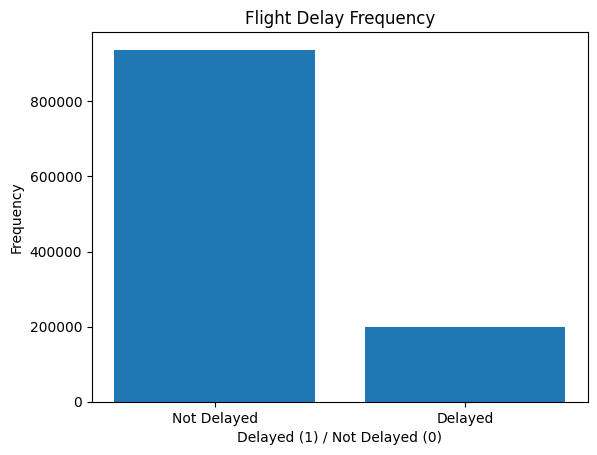

In [ ]:

delay_counts = dataset['DEP_DEL15'].value_counts()
# Plot the frequency chart
plt.bar(delay_counts.index, delay_counts.values)
plt.xlabel('Delayed (1) / Not Delayed (0)')
plt.ylabel('Frequency')
plt.title('Flight Delay Frequency')
plt.xticks(delay_counts.index, ['Not Delayed', 'Delayed'])  # Customize x-axis labels
plt.show()

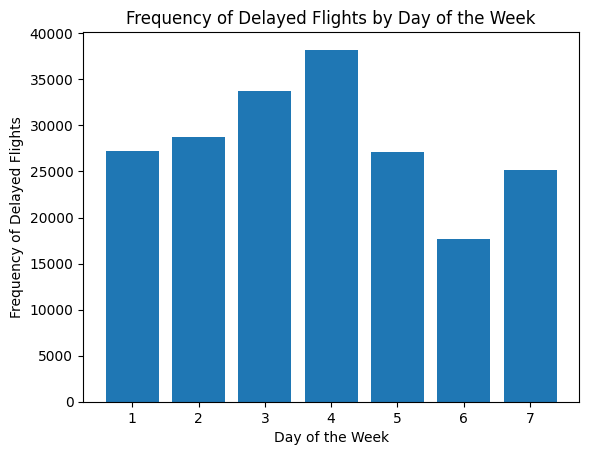

In [ ]:
delayed_by_day = dataset[dataset['DEP_DEL15'] == 1]['DAY_OF_WEEK'].value_counts().sort_index()
plt.bar(delayed_by_day.index, delayed_by_day.values)
plt.xlabel('Day of the Week')
plt.ylabel('Frequency of Delayed Flights')
plt.title('Frequency of Delayed Flights by Day of the Week')
plt.show()

In [ ]:
total_flights_by_day = dataset['DAY_OF_MONTH'].value_counts().sort_index()

# Calculate the number of delayed flights for each day of the month
delayed_flights_by_day = dataset[dataset['DEP_DEL15'] == 1]['DAY_OF_MONTH'].value_counts().sort_index()

# Calculate the percentage of delayed flights for each day of the month
percentage_delayed_by_day = (delayed_flights_by_day / total_flights_by_day) * 100

# Create a DataFrame to display the results
result_table = pd.DataFrame({
    'Day of Month': total_flights_by_day.index,
    'Total Flights': total_flights_by_day.values,
    'Delayed Flights': delayed_flights_by_day.values,
    'Percentage Delayed (%)': percentage_delayed_by_day.values
})

# Display the result table
print(result_table)

    Day of Month  Total Flights  Delayed Flights  Percentage Delayed (%)
0              1          36018             7566               21.006164
1              2          40768            10150               24.896978
2              3          39044             7452               19.086159
3              4          39132             5238               13.385465
4              5          33614             5322               15.832689
5              6          38896             7600               19.539284
6              7          40030             5660               14.139395
7              8          37630             3820               10.151475
8              9          38472             3644                9.471824
9             10          39960             5412               13.543544
10            11          40164             5746               14.306344
11            12          30630             3808               12.432256
12            13          37122             5536   

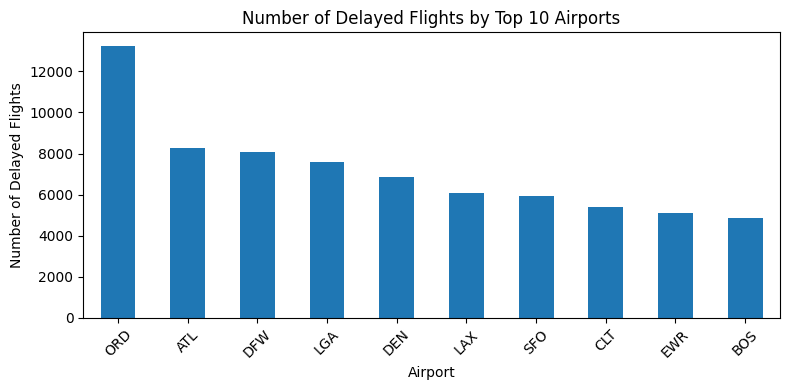

In [ ]:
delayed_by_airport = dataset[dataset['DEP_DEL15'] == 1]['ORIGIN'].value_counts().sort_values(ascending=False)

# Select the top 10 airports
top_airports = delayed_by_airport.head(10)

# Plot the frequency chart for the top 10 airports
plt.figure(figsize=(8, 4))
top_airports.plot(kind='bar')
plt.xlabel('Airport')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights by Top 10 Airports')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

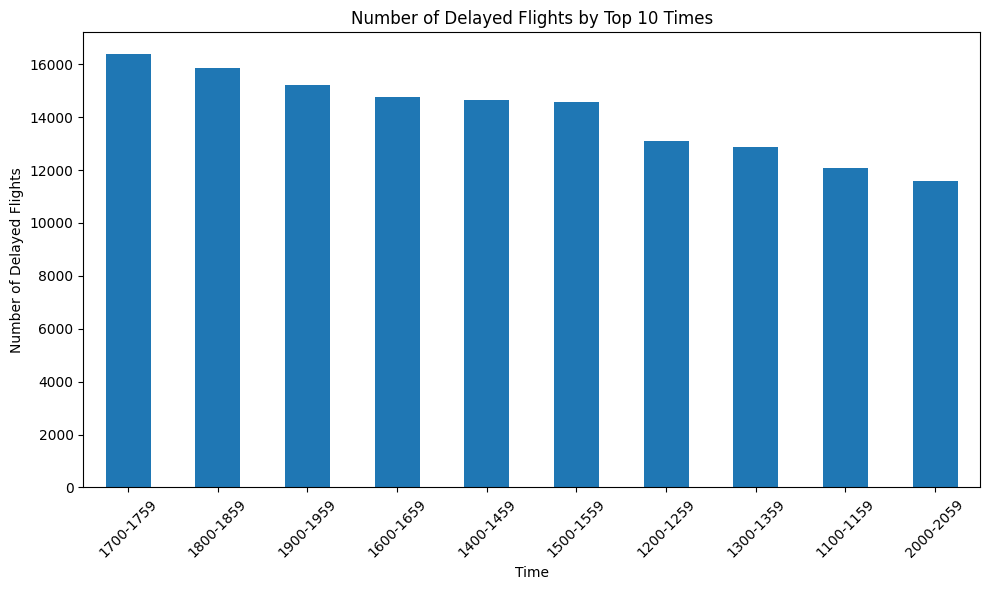

In [ ]:
delayed_by_time = dataset[dataset['DEP_DEL15'] == 1]['DEP_TIME_BLK'].value_counts().sort_values(ascending=False)

# Select the top 10 times
top_time = delayed_by_time.head(10)

# Plot the frequency chart for the top 10 airports
plt.figure(figsize=(10, 6))
top_time.plot(kind='bar')
plt.xlabel('Time')
plt.ylabel('Number of Delayed Flights')
plt.title('Number of Delayed Flights by Top 10 Times')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
selected_features = ["DAY_OF_MONTH", 	"DAY_OF_WEEK", 	"ORIGIN", "DEP_DEL15" ,	"DEP_TIME_BLK"]
dataset = dataset[selected_features]
dataset.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEP_DEL15,DEP_TIME_BLK
0,1,2,GNV,0.0,0600-0659
1,1,2,MSP,0.0,1400-1459
2,1,2,DTW,0.0,1200-1259
3,1,2,TLH,0.0,1500-1559
4,1,2,ATL,0.0,1900-1959


In [ ]:


# Separate delayed and not delayed flights
delayed_flights = dataset[dataset['DEP_DEL15'] == 1]
not_delayed_flights = dataset[dataset['DEP_DEL15'] == 0]

# Sample 200,000 instances of not delayed flights
not_delayed_sample = not_delayed_flights.sample(n=200000, random_state=42)

# Combine the sampled not delayed flights with the delayed flights
balanced_data = pd.concat([not_delayed_sample, delayed_flights])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


# Calculate frequency table
delay_counts = balanced_data['DEP_DEL15'].value_counts()
print("Frequency Table:")
print("Delayed (1):", delay_counts[1])
print("Not Delayed (0):", delay_counts[0])


Frequency Table:
Delayed (1): 197854
Not Delayed (0): 200000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.6022
ROC-AUC Score: 0.6456
              precision    recall  f1-score   support

         0.0       0.61      0.57      0.59     39848
         1.0       0.59      0.64      0.62     39723

    accuracy                           0.60     79571
   macro avg       0.60      0.60      0.60     79571
weighted avg       0.60      0.60      0.60     79571



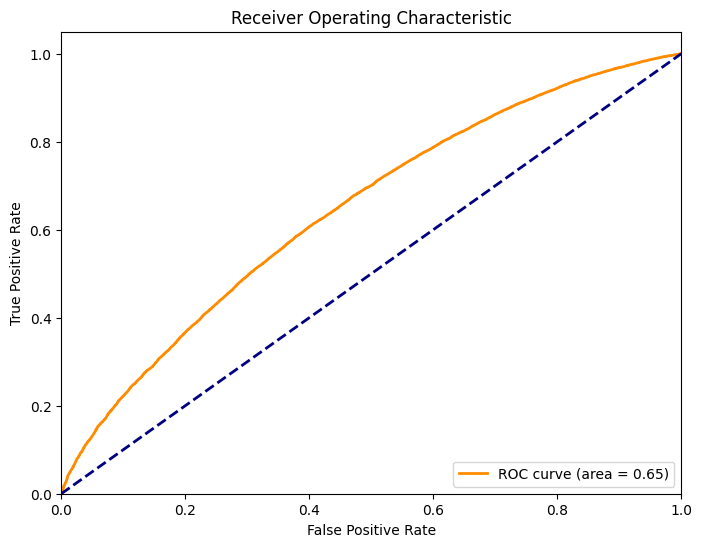

In [ ]:



# Drop rows with missing values
balanced_data = balanced_data.dropna()

# Select the features and target variable
selected_features = ['DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEP_TIME_BLK']
X = balanced_data[selected_features]
y = balanced_data['DEP_DEL15']

# One-hot encode categorical columns 'ORIGIN' and 'DEP_TIME_BLK'
categorical_columns = ['ORIGIN', 'DEP_TIME_BLK']
ohe = OneHotEncoder(drop='first', sparse=False)
X_encoded = ohe.fit_transform(X[categorical_columns])
X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(categorical_columns))
X = pd.concat([X.drop(categorical_columns, axis=1), X_encoded_df], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Print classification report for detailed performance metrics
print(classification_report(y_test, y_pred))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
new_data.drop(["YEAR", "AIRLINE", "TAIL_NUMBER", "DESTINATION_AIRPORT", "SCHEDULED_DEPARTURE", "DEPARTURE_DELAY", "TAXI_OUT", "WHEELS_OFF", "SCHEDULED_TIME", "ELAPSED_TIME", "AIR_TIME", "DISTANCE", "WHEELS_ON",	"TAXI_IN",	"SCHEDULED_ARRIVAL",	"ARRIVAL_TIME",	"ARRIVAL_DELAY",	"DIVERTED",	"CANCELLED",	"CANCELLATION_REASON",	"AIR_SYSTEM_DELAY",	"SECURITY_DELAY", "AIRLINE_DELAY",	"LATE_AIRCRAFT_DELAY",	"WEATHER_DELAY", "FLIGHT_NUMBER"], axis =1 )


,MONTH,DAY,DAY_OF_WEEK,ORIGIN_AIRPORT,DEPARTURE_TIME
0,1,1,4,ANC,2354.0
1,1,1,4,LAX,2.0
2,1,1,4,SFO,18.0
3,1,1,4,LAX,15.0
4,1,1,4,SEA,24.0
...,...,...,...,...,...
5819074,12,31,4,LAX,2355.0
5819075,12,31,4,JFK,2355.0
5819076,12,31,4,JFK,2350.0
5819077,12,31,4,MCO,2353.0
